# **scatter plot and compare all tissue coefs**

In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
femaleGerm_coefs <- read.csv("../../data/germline/dataframes/model1/female_coeff_dataframe2021-11-07_predictorDF_2021_11_04_comb_32trips.txt")
maleGerm_coefs <- read.csv("../../data/germline/dataframes/model1/male_coeff_dataframe2021-11-07_predictorDF_2021_11_04_comb_32trips.txt")
blood_coefs <- read.csv("../../data/blood/dataframes/model1/coeff_dataframe2021-11-07_predictorDf_2021_11_04_full_32trips.tx")
skin_coefs <- read.csv("../../data/skin/dataframes/model1/coeff_dataframe2021-11-14_fromFile_predictorDf_2021_11_13_full_nonDiscordant_bufferOmit_header.txt")

In [7]:
colnames(blood_coefs) <- c("name","blood_coef")
colnames(maleGerm_coefs) <-c("name","maleGerm_coefs")
colnames(femaleGerm_coefs) <-c("name","femaleGerm_coefs")
colnames(skin_coefs) <- c("name","skin_coef")

In [8]:
blood_coefs_ordered <- blood_coefs[order(blood_coefs$name),] #https://www.statmethods.net/management/sorting.html
femaleGerm_coefs_ordered <- femaleGerm_coefs[order(femaleGerm_coefs$name),] 
maleGerm_coefs_ordered <- maleGerm_coefs[order(maleGerm_coefs$name),] 
skin_coefs_ordered <- skin_coefs[order(skin_coefs$name),] 

In [9]:
all_coefs <-merge(blood_coefs_ordered,femaleGerm_coefs_ordered)
all_coefs <- merge(all_coefs,maleGerm_coefs_ordered)
all_coefs <- merge(all_coefs,skin_coefs_ordered)

In [10]:
all_coefs<-all_coefs %>%
    mutate(type = case_when(        
        str_detect(name, 'percent') ~ 'sequence',
        str_detect(name, 'Chromosome') ~ 'sequence',
        str_detect(name, 'Repeats') ~ 'sequence',
        str_detect(name, 'site') ~ 'sequence',
        
        str_detect(name, 'triplet') ~ 'triplet',
        
        str_detect(name, 'DNAse') ~ 'tissue specific',
        str_detect(name, 'Transcription') ~ 'tissue specific',
        str_detect(name, 'H3k') ~ 'tissue specific',
        
        str_detect(name, 'recomb') ~ 'global',
        str_detect(name, 'lamin') ~ 'global',
        str_detect(name, 'Replication') ~ 'global',
    ))

Saving 6.67 x 6.67 in image



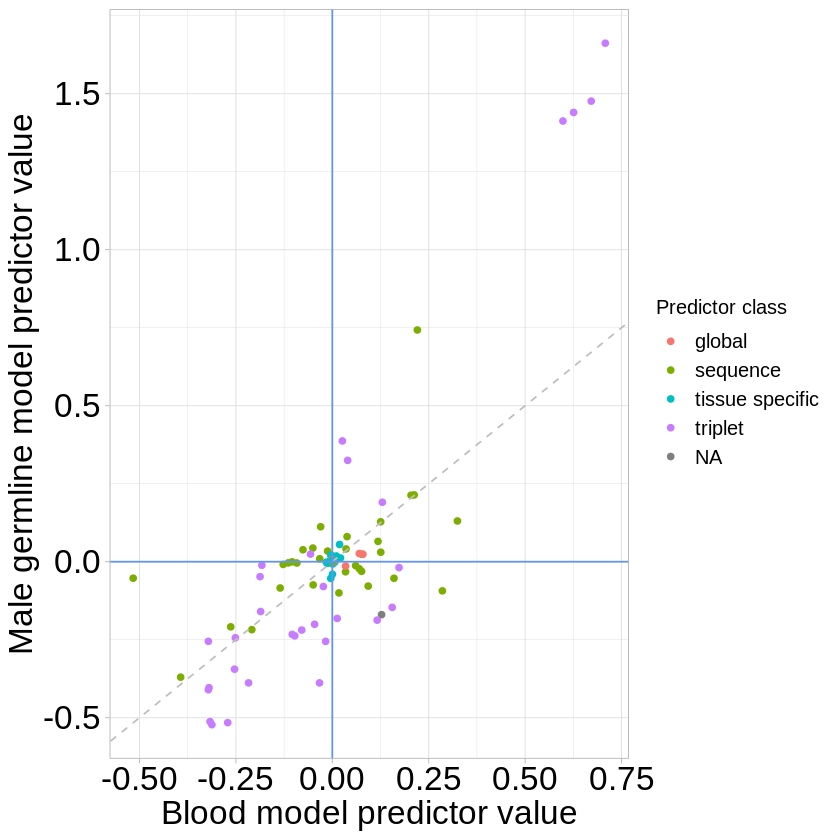

In [11]:
ggplot(all_coefs, aes(y = maleGerm_coefs, x = blood_coef)) +
    geom_point(aes(color=type) )+
    theme_light()+
#     scale_y_continuous(breaks=seq(-0.75,1.75,0.75)) +
#     scale_x_continuous(breaks=seq(-0.75,1.75,0.75)) +
    geom_abline(intercept=0, slope=1, col="grey",linetype="dashed")+ #http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
    geom_abline(intercept=0, slope=0, col="cornflowerblue")+
    geom_vline(xintercept=0,col="cornflowerblue") + #http://www.sthda.com/english/wiki/ggplot2-add-straight-lines-to-a-plot-horizontal-vertical-and-regression-lines
    labs(
        x = 'Blood model predictor value',
        y = 'Male germline model predictor value',
        color = "Predictor class"#https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot
        ) +
    theme(
    axis.text = element_text(size = 20, family = 'Helvetica', color = 'black'),
    axis.title = element_text(size = 20, family = 'Helvetica'),
    legend.title = element_text(size=12, family = 'Helvetica'),
    legend.text = element_text(size = 12, family = 'Helvetica')
    )   
# ggsave(paste("plots/model1_",toString(Sys.Date()),"coefScatter_blood_maleGerm_appraisal.pdf",sep=""))

Saving 6.67 x 6.67 in image



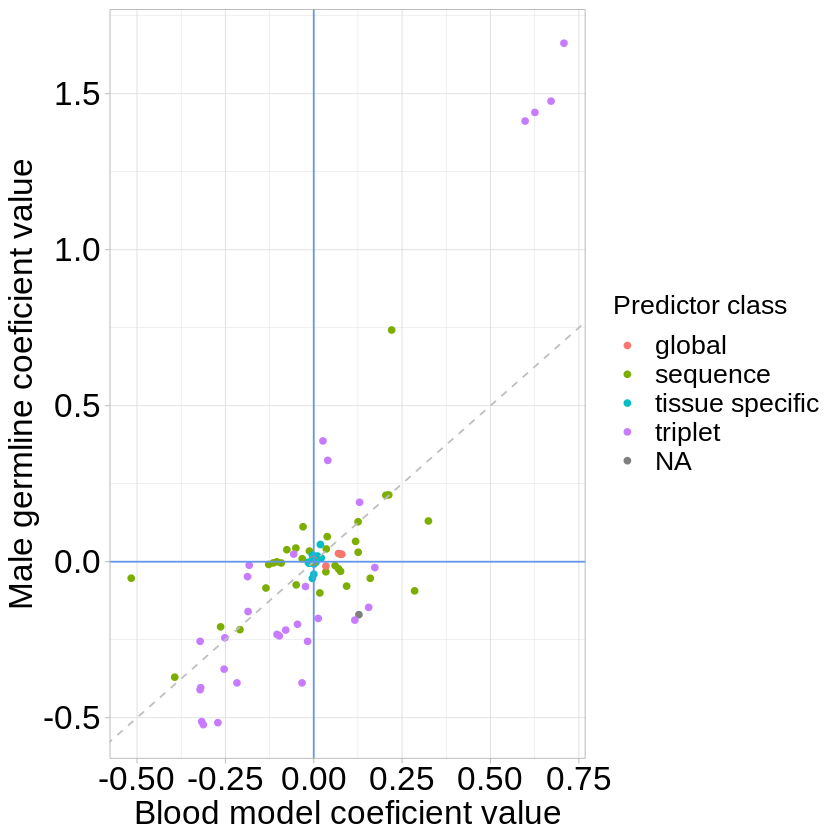

In [12]:
ggplot(all_coefs, aes(x = blood_coef, y = maleGerm_coefs)) +
    geom_point(aes(color=type) )+
    theme_light()+
#     scale_y_continuous(breaks=seq(-0.75,1.75,0.75)) +
#     scale_x_continuous(breaks=seq(-0.75,1.75,0.75)) +
    geom_abline(intercept=0, slope=1, col="grey",linetype="dashed")+ #http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
    geom_abline(intercept=0, slope=0, col="cornflowerblue")+
    geom_vline(xintercept=0,col="cornflowerblue") + #http://www.sthda.com/english/wiki/ggplot2-add-straight-lines-to-a-plot-horizontal-vertical-and-regression-lines
    labs(
        x = 'Blood model coeficient value',
        y = 'Male germline coeficient value',
        color = "Predictor class"#https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot
        ) +
    theme(
    axis.text = element_text(size = 20, family = 'Helvetica', color = 'black'),
    axis.title = element_text(size = 20, family = 'Helvetica'),
    legend.title = element_text(size=16, family = 'Helvetica'),
    legend.text = element_text(size = 16, family = 'Helvetica')
    )   
# ggsave(paste("plots/model1_",toString(Sys.Date()),"coefScatter_maleGerm_blood_appraisal.pdf",sep=""))

Saving 6.67 x 6.67 in image



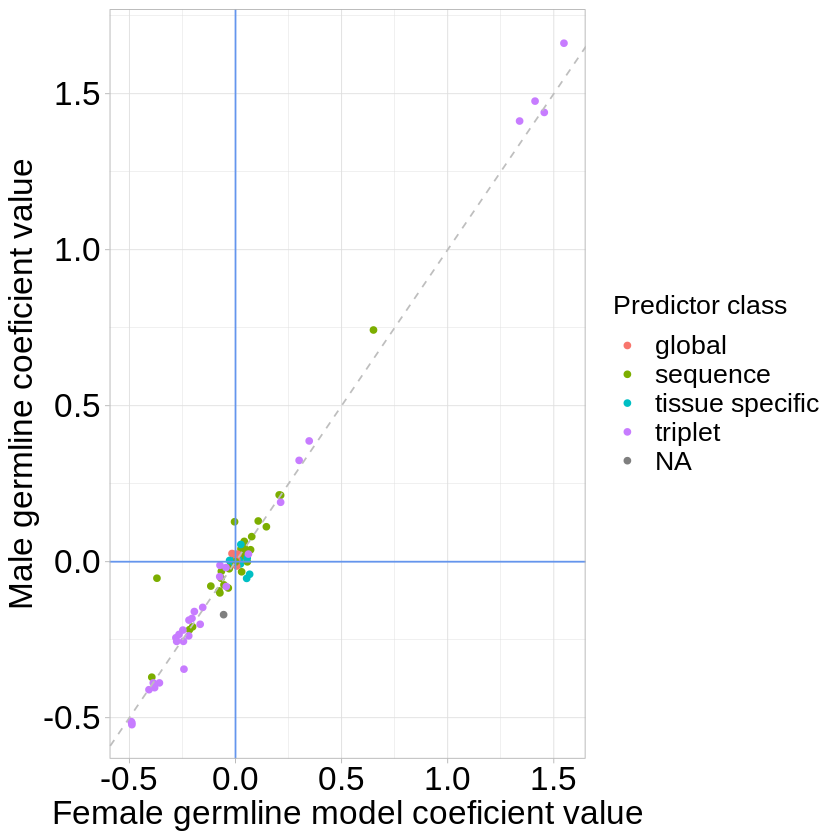

In [13]:
ggplot(all_coefs, aes(x = femaleGerm_coefs, y = maleGerm_coefs)) +
    geom_point(aes(color=type) )+
    theme_light()+
    geom_abline(intercept=0, slope=1, col="grey",linetype="dashed")+ #http://www.sthda.com/english/wiki/ggplot2-line-types-how-to-change-line-types-of-a-graph-in-r-software
    geom_abline(intercept=0, slope=0, col="cornflowerblue")+
    geom_vline(xintercept=0,col="cornflowerblue") + #http://www.sthda.com/english/wiki/ggplot2-add-straight-lines-to-a-plot-horizontal-vertical-and-regression-lines
    labs(
        x = 'Female germline model coeficient value',
        y = 'Male germline coeficient value',
        color = "Predictor class"#https://stackoverflow.com/questions/14622421/how-to-change-legend-title-in-ggplot
        ) +
    theme(
    axis.text = element_text(size = 20, family = 'Helvetica', color = 'black'),
    axis.title = element_text(size = 20, family = 'Helvetica'),
    legend.title = element_text(size=16, family = 'Helvetica'),
    legend.text = element_text(size = 16, family = 'Helvetica')
        )
# ggsave(paste("plots/model1_",toString(Sys.Date()),"coefScatter_maleGerm_femaleGerm_appraisal.pdf",sep=""))

# **getting accuracy**

In [14]:
head(all_coefs[order(all_coefs$femaleGerm_coefs),],n=20)

,name,blood_coef,femaleGerm_coefs,maleGerm_coefs,skin_coef,type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
93,tripletTTT,-0.31703211,-0.4914881,-0.51246590,-0.3120336,triplet
75,tripletCTC,-0.27116449,-0.4885689,-0.51593039,-0.2459106,triplet
91,tripletTTC,-0.31229745,-0.4883462,-0.52236525,-0.5256707,triplet
92,tripletTTG,-0.32138159,-0.4077758,-0.41022464,-0.3928470,triplet
28,Cpercent.10000,-0.39324993,-0.3945262,-0.37010637,-0.6198274,sequence
70,tripletCCA,-0.03313467,-0.3875446,-0.38846069,0.2623783,triplet
77,tripletCTT,-0.31978033,-0.3812762,-0.40377348,-0.3176556,triplet
34,Gpercent.10000,-0.51634379,-0.3702470,-0.05290414,-0.7221024,sequence
86,tripletTCA,-0.21718858,-0.3586953,-0.38840745,0.7952306,triplet


In [14]:
mean(abs(all_coefs$blood_coef - all_coefs$skin_coef))

[1] 0.1979042

In [15]:
mean(abs(all_coefs$maleGerm_coefs - all_coefs$skin_coef))

[1] 0.2488498

In [16]:
mean(abs(all_coefs$blood_coef - all_coefs$maleGerm_coefs))

[1] 0.1322941

In [17]:
summary(lm(all_coefs$maleGerm_coefs~all_coefs$skin_coef))


Call:
lm(formula = all_coefs$maleGerm_coefs ~ all_coefs$skin_coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87455 -0.10547 -0.00344  0.09800  1.25038 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.01745    0.03278   0.532    0.596    
all_coefs$skin_coef  0.46800    0.08166   5.731 1.28e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.316 on 91 degrees of freedom
Multiple R-squared:  0.2652,	Adjusted R-squared:  0.2571 
F-statistic: 32.84 on 1 and 91 DF,  p-value: 1.283e-07


In [19]:
summary(lm(all_coefs$blood_coef~all_coefs$skin_coef))


Call:
lm(formula = all_coefs$blood_coef ~ all_coefs$skin_coef)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48816 -0.05990  0.00295  0.08137  0.47377 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.002568   0.016412   0.156    0.876    
all_coefs$skin_coef 0.313406   0.040892   7.664 1.89e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1583 on 91 degrees of freedom
Multiple R-squared:  0.3923,	Adjusted R-squared:  0.3856 
F-statistic: 58.74 on 1 and 91 DF,  p-value: 1.888e-11


In [18]:
summary(lm(all_coefs$blood_coef~all_coefs$maleGerm_coefs))


Call:
lm(formula = all_coefs$blood_coef ~ all_coefs$maleGerm_coefs)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.48627 -0.06864  0.00322  0.05508  0.33397 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -0.006009   0.011868  -0.506    0.614    
all_coefs$maleGerm_coefs  0.454938   0.032516  13.991   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1144 on 91 degrees of freedom
Multiple R-squared:  0.6827,	Adjusted R-squared:  0.6792 
F-statistic: 195.8 on 1 and 91 DF,  p-value: < 2.2e-16
